<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#降维技术" data-toc-modified-id="降维技术-1">降维技术</a></span></li><li><span><a href="#3.2-PCA" data-toc-modified-id="3.2-PCA-2">3.2 PCA</a></span><ul class="toc-item"><li><span><a href="#3.2.1-移动坐标轴" data-toc-modified-id="3.2.1-移动坐标轴-2.1">3.2.1 移动坐标轴</a></span></li><li><span><a href="#在Numpy中实现PCA" data-toc-modified-id="在Numpy中实现PCA-2.2">在Numpy中实现PCA</a></span></li></ul></li><li><span><a href="#13.3-示例：利用PCA对半导体制造数据降维" data-toc-modified-id="13.3-示例：利用PCA对半导体制造数据降维-3">13.3 示例：利用PCA对半导体制造数据降维</a></span></li></ul></div>

# 利用PCA来简化数据
在低维下，数据更容易进行处理，另外，其相关特征可能在数据中明确地显示出来。通常而言，在进行机器算法之前，我们都要应用**特征工程**识别出其相关特征。

## 降维技术
真实世界中数据的维度很大，对数据和模型结果的展示成为了一个挑战。同时，对数据进行简化还有以下原因：
- 使得数据更易使用
- 降低很多算法的计算开销
- 去除噪声
- 使得结果更易懂

降为技术：
- 主成份分析\PCA(Principal Component Analysis)
- 因子分析(Factor Analysis)
- 独立成分分析\ICA(Independent Component Analysis)

## 3.2 PCA
- 优点：降低数据的复杂性，识别最重要的多个特征
- 缺点：不一定需要，且可能损失有用信息
- 适用数据：数值型数据

### 3.2.1 移动坐标轴
- [ ] 补充图片内容


### 在Numpy中实现PCA
伪代码如下：

    去除平均值
    计算协方差矩阵
    计算协方差矩阵的特征值和特征向量
    将特征值从大到小排序
    保留最上面的N个特征向量
    将数据转换到上述N个特征向量构建的新空间当中

In [76]:
# PCA算法
from numpy import *
def loadDataSet(fileName, delim='\t'):
    fr = open(fileName)
    stringArr = [line.strip().split(delim) for line in fr.readlines()]    # 按照tab划分数据
    datArr = [map(float, line) for line in stringArr]    # line转换为浮点类型
    return mat(datArr)    # 返回numpy mat类型

def pca(dataMat, topNfeat = 9999999):
    '''pca 降维
    传入：
    dataMat：数据
    返回：
    lowDDataMat：压缩到低维空间
    reconMat：压缩后再还原回高纬空间
    '''
    meanVals = mean(dataMat, axis=0)    # 计算样本均值，第0维度是n个样本
    meanRemoved = dataMat - meanVals    # 减去均值 
    covMat = cov(meanRemoved, rowvar=0) # 计算协方差矩阵,按照列取向量[X,Y],
                                        # 协方差矩阵输出[[sum（（X-X.mean）(X-X.mean)）, sum（（Y-Y.mean）(X-X.mean)）「
                                        #             sum（（X-X.mean）(Y-Y.mean)），sum（（Y-Y.mean）(Y-Y.mean)）]
    eigVals, eigVects = linalg.eig(mat(covMat))    # 计算协方差矩阵的特征值和特征向量
    eigValInd = argsort(eigVals)    # 特征值从小到大排序
    eigValInd = eigValInd[:-(topNfeat+1):-1]    # 倒序着从大到小取topNfeat个，步长为-1
    redEigVects = eigVects[:,eigValInd]    # 保留最上面的特征
    lowDDataMat = meanRemoved * redEigVects    # 转换到低维空间，压缩
    print lowDDataMat
    reconMat = (lowDDataMat * redEigVects.T) + meanVals    # 转换回高维空间，去除了噪声
    print shape(reconMat)
    return lowDDataMat, reconMat


In [77]:
# 读取数据
dataMat = loadDataSet('testSet.txt')
# pca算法, 压缩到1的维度
lowDMat, reconMat = pca(dataMat, 1)

[[ 10.235186  11.321997]
 [ 10.122339  11.810993]
 [  9.190236   8.904943]
 [  9.306371   9.847394]
 [  8.330131   8.340352]]
[[-1.49934778]
 [-1.88565854]
 [ 1.12957083]
 [ 0.23527086]
 [ 2.02016463]]
(5, 2)
[[-1.49934778]
 [-1.88565854]
 [ 1.12957083]
 [ 0.23527086]
 [ 2.02016463]] 
[[ 10.10986902  11.38494648]
 [ 10.28327341  11.7301521 ]
 [  8.92981899   9.0357562 ]
 [  9.33124591   9.83489878]
 [  8.53005566   8.23992544]]


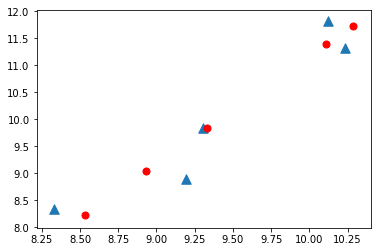

In [72]:
#绘制数据
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(dataMat[:,0].flatten().A[0], dataMat[:,1].flatten().A[0], marker='^', s=90)
ax.scatter(reconMat[:,0].flatten().A[0], reconMat[:,1].flatten().A[0], marker='o', s=50, c='red')

## 13.3 示例：利用PCA对半导体制造数据降维


In [96]:
# 将NaN替换成平均值的函数
def replaceNanWithMean():
    datMat = loadDataSet('secom.data', ' ')
    print shape(datMat)
    numFeat = shape(datMat)[1]
    for i in range(numFeat):
#         print nonzero(~isnan(datMat[:,i].A))
        meanVal = mean(datMat[nonzero(~isnan(datMat[:,i].A))[0], i])
        datMat[nonzero(isnan(datMat[:,i].A))[0],i] = meanVal
    return datMat

In [97]:
dataMat = replaceNanWithMean()    # 读取数据并替换NaN值
meanVals = mean(dataMat, axis=0)    # 每列属性均值
meanRemoved = dataMat - meanVals    # 数据集减均值
covMat = cov(meanRemoved, rowvar=0)    # 数据集的自协方差矩阵
eigVals, eigVects = linalg.eig(mat(covMat))    # 矩阵分解
print eigVals    # 可视化分析特征值

(1567, 590)
[  5.34151979e+07   2.17466719e+07   8.24837662e+06   2.07388086e+06
   1.31540439e+06   4.67693557e+05   2.90863555e+05   2.83668601e+05
   2.37155830e+05   2.08513836e+05   1.96098849e+05   1.86856549e+05
   1.52422354e+05   1.13215032e+05   1.08493848e+05   1.02849533e+05
   1.00166164e+05   8.33473762e+04   8.15850591e+04   7.76560524e+04
   6.66060410e+04   6.52620058e+04   5.96776503e+04   5.16269933e+04
   5.03324580e+04   4.54661746e+04   4.41914029e+04   4.15532551e+04
   3.55294040e+04   3.31436743e+04   2.67385181e+04   1.47123429e+04
   1.44089194e+04   1.09321187e+04   1.04841308e+04   9.48876548e+03
   8.34665462e+03   7.22765535e+03   5.34196392e+03   4.95614671e+03
   4.23060022e+03   4.10673182e+03   3.41199406e+03   3.24193522e+03
   2.74523635e+03   2.35027999e+03   2.16835314e+03   1.86414157e+03
   1.76741826e+03   1.70492093e+03   1.66199683e+03   1.53948465e+03
   1.33096008e+03   1.25591691e+03   1.15509389e+03   1.12410108e+03
   1.03213798e+03   1.

In [95]:
nonzero([12,12
        ])

(array([0, 1]),)